In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
raw_data = pd.read_csv("ramani_home_assignment - Sheet1.csv")

In [3]:
raw_data

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product
0,1,15,39,Mtwara,Mtindi 500ml
1,2,15,81,Zanzibar City,Fresh Milk 250ml
2,3,16,6,Mtwara,Mtindi 500ml
3,4,16,77,Zanzibar City,Fresh Milk 250ml
4,5,17,40,Mtwara,Mtindi 500ml
...,...,...,...,...,...
195,196,120,79,Dar es Salaam,Mtindi 250ml
196,197,126,28,Dar es Salaam,Mtindi 250ml
197,198,126,74,Dar es Salaam,Mtindi 250ml
198,199,137,18,Dar es Salaam,Mtindi 250ml


### Data Exploration

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual Revenue (k$)     200 non-null    int64 
 2   Spending Score (1-100)  200 non-null    int64 
 3   City                    200 non-null    object
 4   Most Purchased Product  200 non-null    object
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


As we I was expecting that as data is small there should not be missing values or errorneous data (Because then after cleaning size of data will be very less)

Not able to understand spending score column properly. But lets see what else data is having!

In [20]:
raw_data.describe()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000
std,57.879185,26.264721,25.823522
min,1.000000,15.000000,1.000000
25%,50.750000,41.500000,34.750000
50%,100.500000,61.500000,50.000000
75%,150.250000,78.000000,73.000000
max,200.000000,137.000000,99.000000


<AxesSubplot:>

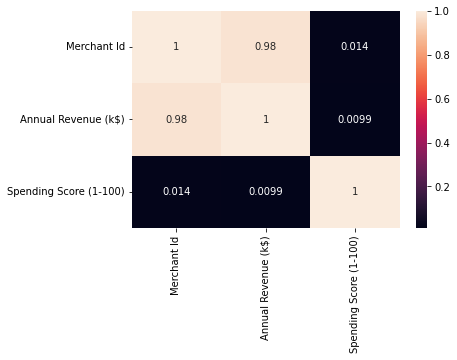

In [5]:
sns.heatmap(raw_data.corr(), annot = True)


In [6]:
raw_data.corr()


,Merchant Id,Annual Revenue (k$),Spending Score (1-100)
Merchant Id,1.000000,0.977548,0.013835
Annual Revenue (k$),0.977548,1.000000,0.009903
Spending Score (1-100),0.013835,0.009903,1.000000


NameError: name 'cities' is not defined

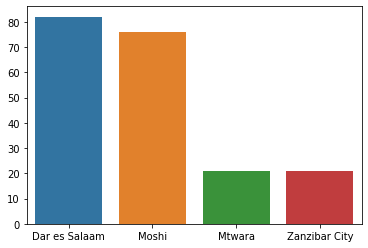

In [8]:
cities = raw_data["City"].value_counts()
sns.barplot(x=cities.index, y=cities.values)
plt.show()

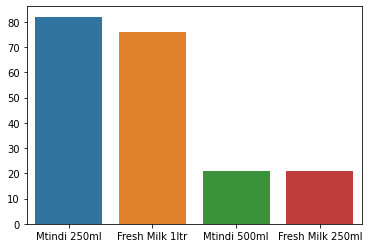

In [9]:
products = raw_data["Most Purchased Product"].value_counts()
sns.barplot(x=products.index, y=products.values)
plt.show()

<AxesSubplot:xlabel='Annual Revenue (k$)', ylabel='Count'>

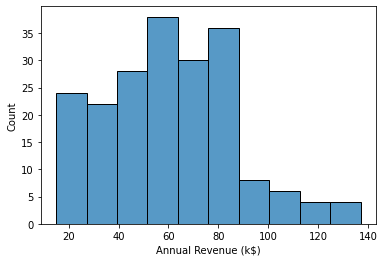

In [10]:
sns.histplot(data=raw_data, x="Annual Revenue (k$)")


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

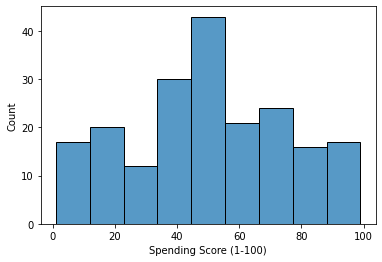

In [11]:
sns.histplot(data=raw_data, x="Spending Score (1-100)")


In [12]:
raw_data

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product
0,1,15,39,Mtwara,Mtindi 500ml
1,2,15,81,Zanzibar City,Fresh Milk 250ml
2,3,16,6,Mtwara,Mtindi 500ml
3,4,16,77,Zanzibar City,Fresh Milk 250ml
4,5,17,40,Mtwara,Mtindi 500ml
...,...,...,...,...,...
195,196,120,79,Dar es Salaam,Mtindi 250ml
196,197,126,28,Dar es Salaam,Mtindi 250ml
197,198,126,74,Dar es Salaam,Mtindi 250ml
198,199,137,18,Dar es Salaam,Mtindi 250ml


<AxesSubplot:xlabel='City', ylabel='Annual Revenue (k$)'>

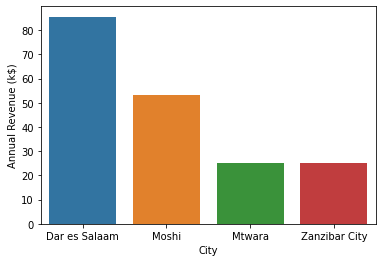

In [13]:
tmp = raw_data[["City", "Annual Revenue (k$)"]].groupby("City").mean()
sns.barplot(data=tmp, x=tmp.index, y="Annual Revenue (k$)")

In [14]:
tmp = raw_data[["City", "Most Purchased Product"]].groupby("City").agg(pd.Series.mode)
tmp

,Most Purchased Product
City,
Dar es Salaam,Mtindi 250ml
Moshi,Fresh Milk 1ltr
Mtwara,Mtindi 500ml
Zanzibar City,Fresh Milk 250ml


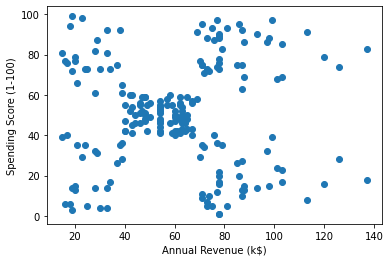

In [21]:
plt.scatter(raw_data['Annual Revenue (k$)'],raw_data['Spending Score (1-100)'])
plt.xlabel('Annual Revenue (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

`` Lets check that with Elbow method

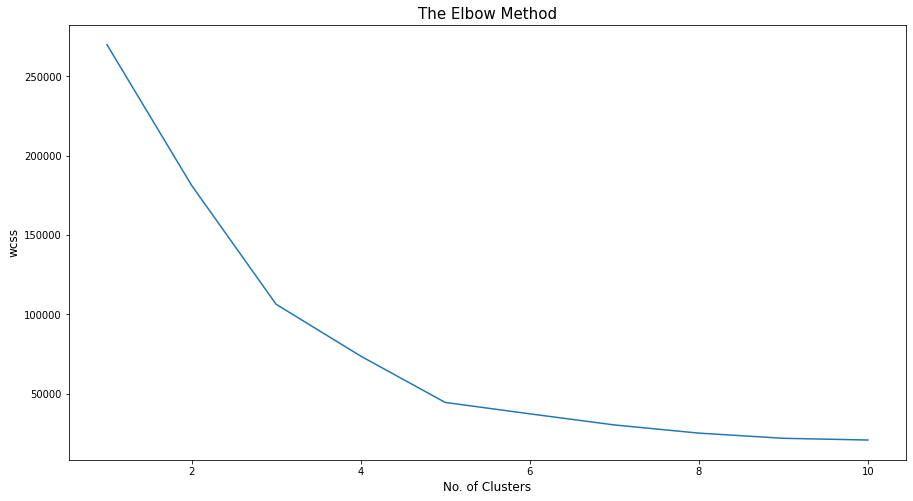

In [16]:
revenue_and_score = raw_data[['Annual Revenue (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(revenue_and_score)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()   

In [17]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(revenue_and_score)

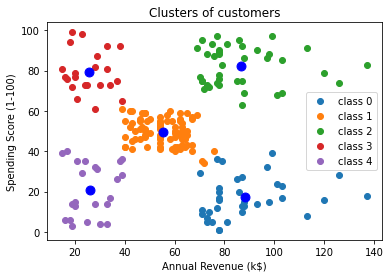

In [18]:
#Getting unique labels
u_labels = np.unique(y_means)
 
#plotting the results:
for i in u_labels:
    plt.scatter(revenue_and_score[y_means == i , 0] , revenue_and_score[y_means == i , 1] , label = "class "+str(i))
    
centroids = km.cluster_centers_
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'Blue')
plt.title('Clusters of customers')
plt.xlabel('Annual Revenue (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
